In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13
### <u>IMPORTANT NOTE:</u> All students must complete HW5 - this homework grade cannot be dropped as part of the lowest homework grade drop policy.

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [34]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

well, firstly the dataset is just plain cool. I do notice from the first few rows that some rows like host name could be dropped. interestingly, i think the listing name does play a factor in whether someone will choose that airbnb and also on their views OF the place itself. There are a couple of listing which I've noticed which have zero reviews so those would have to be removed. the data also must be scaled i think. there's a few listing which are ridiculously expensive which are outliers, some dont even have any reviews. and other's while do have everything ready seemingly have 0 listed as the price. these are things which need to be addressed. i think features like latitude and longitude could be dropped, or atleast combined, neighbourhood and neighbourhood group both exist already. we could also drop number of reviews in favour of reviews per month to make sure that the listing is relevant and not something from yesteryear.

In [3]:
df=pd.read_csv("./data/AB_NYC_2019.csv")
df.head()
df

df_sorted = df.sort_values(by="price", ascending=False)
df_sorted

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3,random_state=123)
print(train_df.shape,test_df.shape)

(34226, 16) (14669, 16)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

we can see that there's a few missing entries in the training data. particularly in host name, name last review and reviews per month. additionally we have various different data types. the dataset has high price variability with many outliers. room type and neighbourhood play a big role in determining price. some listings are just abnormal. the histogram shows that most listings are around the $300 range, and that quite obviously the bigger the listing (an entire house over a shared room) the higher the median price.

In [5]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27236.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,1.369816,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,1.700737,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Summary Statistics:
Price - Mean: $151.56, Median: $107.00
Minimum Nights - Mean: 7.10, Median: 3.00


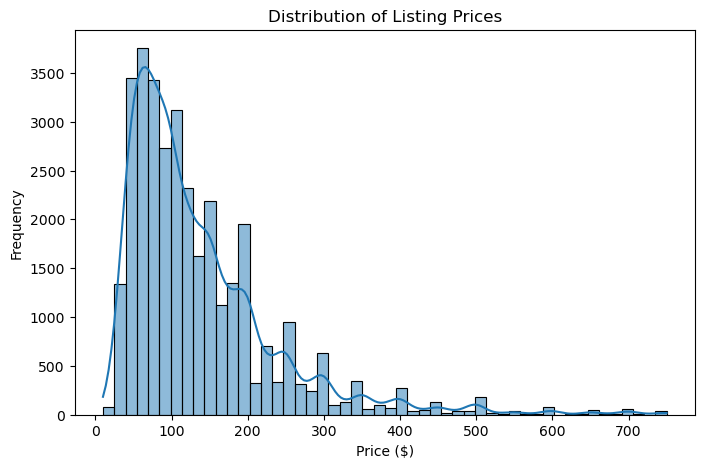

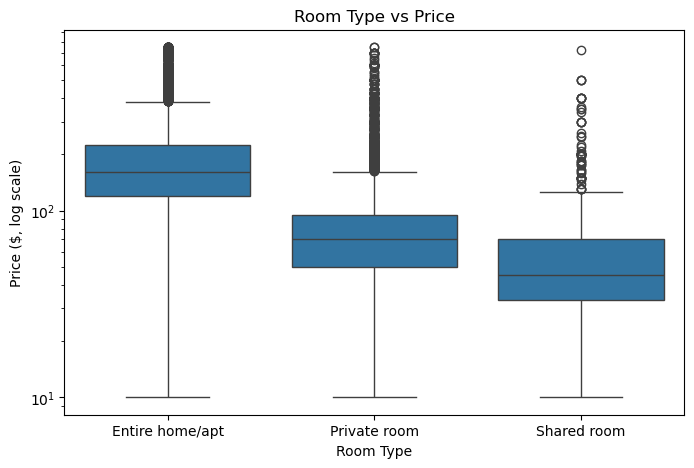

In [6]:
train_clean = train_df.copy()
train_clean["reviews_per_month"] = train_clean["reviews_per_month"].fillna(0)
train_clean = train_clean[train_clean["price"] > 0]
price_cap = train_clean["price"].quantile(0.99)
train_cap = train_clean[train_clean["price"] <= price_cap]
price_mean = train_clean["price"].mean()
price_median = train_clean["price"].median()
min_nights_mean = train_clean["minimum_nights"].mean()
min_nights_median = train_clean["minimum_nights"].median()
print("Summary Statistics:")
print(f"Price - Mean: ${price_mean:.2f}, Median: ${price_median:.2f}")
print(f"Minimum Nights - Mean: {min_nights_mean:.2f}, Median: {min_nights_median:.2f}")
plt.figure(figsize=(8, 5))
sns.histplot(train_cap["price"], bins=50, kde=True)
plt.title("Distribution of Listing Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_cap, x="room_type", y="price")
plt.yscale("log")
plt.title("Room Type vs Price")
plt.xlabel("Room Type")
plt.ylabel("Price ($, log scale)")
plt.show()

In [7]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [8]:
train_clean["price_per_min_night"] = train_clean["price"] / train_clean["minimum_nights"]
train_clean["has_recent_reviews"] = (train_clean["reviews_per_month"] > 0).astype(int)
train_clean["log_price"] = np.log1p(train_clean["price"])  # log(1 + price) to handle 0s safely
train_clean["reviews_per_day_available"] = train_clean["number_of_reviews"] / train_clean["availability_365"].replace(0, 1)
train_clean = pd.get_dummies(train_clean, columns=["neighbourhood_group", "room_type"], drop_first=True)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

### Features used for transformations
i would use these features for the transformations
- minimum_nights
- availability_365
- reviews_per_month
- reviews_per_day_available
- price_per_min_night


These features vary in scale and range, so we apply standardization using StandardScaler to normalize them and improve model performance. The categorical features, namely neighbourhood_group and room_type, were previously encoded using manual one-hot encoding via pd.get_dummies(), resulting in columns like neighbourhood_group_Brooklyn and room_type_Private room. Since these are already binary, we simply pass them through without further transformation. We also include has_recent_reviews as a binary feature, which does not require scaling or encoding. 
we define a ColumnTransformer that standardizes the numeric features while passing through the pre-encoded and binary features.

In [26]:
df = pd.read_csv("./data/AB_NYC_2019.csv")
train_df, _ = train_test_split(df, test_size=0.3, random_state=123)

# Feature engineering
train_clean = train_df.copy()
train_clean["reviews_per_month"] = train_clean["reviews_per_month"].fillna(0)
train_clean = train_clean[train_clean["price"] > 0]
train_clean["price_per_min_night"] = train_clean["price"] / train_clean["minimum_nights"]
train_clean["has_recent_reviews"] = (train_clean["reviews_per_month"] > 0).astype(int)
train_clean["log_price"] = np.log1p(train_clean["price"])
train_clean["reviews_per_day_available"] = train_clean["number_of_reviews"] / train_clean["availability_365"].replace(0, 1)

# Manual one-hot encoding
train_clean = pd.get_dummies(train_clean, columns=["neighbourhood_group", "room_type"], drop_first=True)

# Prepare X and y
X_train = train_clean.drop(columns=["log_price"])
y_train = train_clean["log_price"]

# Update feature lists
numeric_feats = ["minimum_nights", "availability_365", "reviews_per_month", 
                 "reviews_per_day_available", "price_per_min_night"]
pass_through = ["has_recent_reviews"] + [col for col in X_train.columns if col.startswith("neighbourhood_group_") or col.startswith("room_type_")]

# Define preprocessor (skip OneHotEncoder)
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats),
    ("passthrough", pass_through)
)

# Transform X
X_train_trans = preprocessor.fit_transform(X_train)

# Build column names list
column_names = numeric_feats + pass_through

# Convert to DataFrame
X_train_trans_df = pd.DataFrame(X_train_trans, columns=column_names)

X_train_trans_df.head()

,minimum_nights,availability_365,reviews_per_month,reviews_per_day_available,price_per_min_night,has_recent_reviews,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,-0.14366,-0.726915,-0.675143,-0.257852,-0.296237,0,False,True,False,False,False,False
1,1.062832,1.669897,-0.675143,-0.257852,-0.419118,0,False,True,False,False,False,False
2,-0.282871,-0.856266,-0.675143,-0.257852,0.842028,0,True,False,False,False,True,False
3,-0.282871,-0.856266,-0.675143,-0.257852,0.162949,0,False,True,False,False,False,False
4,-0.190064,-0.856266,-0.656561,-0.184008,-0.02245,1,True,False,False,False,False,False


In [27]:
...

Ellipsis

In [28]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [31]:
baseline_model = DummyRegressor(strategy="mean")

# Evaluate using cross-validation (R^2 and negative MAE)
r2_scores = cross_val_score(baseline_model, X_train_trans_df, y_train, cv=5, scoring="r2")
mae_scores = cross_val_score(baseline_model, X_train_trans_df, y_train, cv=5, scoring="neg_mean_absolute_error")

# Convert MAE to positive values
mae_scores = -mae_scores

# Report results
baseline_results = {
    "R2 Mean": np.mean(r2_scores),
    "R2 Std": np.std(r2_scores),
    "MAE Mean": np.mean(mae_scores),
    "MAE Std": np.std(mae_scores)
}

baseline_results

{'R2 Mean': np.float64(-0.0002449634820751889),
 'R2 Std': np.float64(0.0002859036089224942),
 'MAE Mean': np.float64(0.5448243842768983),
 'MAE Std': np.float64(0.003025213249826204)}

- The R² near zero means the baseline model explains virtually none of the variance in the target variable.
- The MAE of ~0.5448 (in log-price scale) will be your reference point — any trained model should ideally have a lower MAE.

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10


- Ridge regression significantly outperforms the baseline model (MAE ≈ 0.5448 → 0.3236).
- The best model uses very light regularization (alpha = 0.01), suggesting most features contribute meaningfully without heavy penalty.
- Low standard deviation implies consistent performance across folds.


These results show that Ridge Regression performs consistently well across a range of small alpha values, indicating that regularization doesn’t heavily penalize feature weights in this dataset. Even small values like 0.01 achieve optimal MAE.


In [33]:
# Define linear model and hyperparameter grid
ridge = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_absolute_error", return_train_score=True)
grid_search.fit(X_train_trans_df, y_train)

# Extract best model and its cross-validation scores
best_model = grid_search.best_estimator_
best_score = -grid_search.best_score_
std_score = grid_search.cv_results_["std_test_score"][grid_search.best_index_]

# Report scores for all hyperparameters
cv_results_summary = pd.DataFrame({
    "alpha": param_grid["alpha"],
    "mean_MAE": -grid_search.cv_results_["mean_test_score"],
    "std_MAE": grid_search.cv_results_["std_test_score"]
})

# Display the CV results using pandas only (no ace_tools)
print("Ridge Regression - Cross-Validation Results:\n")
print(cv_results_summary.to_string(index=False))

# Print best model performance summary
print("\nBest Hyperparameter and Performance:")
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best MAE: {best_score:.4f}")
print(f"MAE Std (best alpha): ±{std_score:.4f}")

Ridge Regression - Cross-Validation Results:

 alpha  mean_MAE  std_MAE
  0.01  0.323620 0.003996
  0.10  0.323620 0.003996
  1.00  0.323620 0.003996
 10.00  0.323629 0.004001
100.00  0.324377 0.004063

Best Hyperparameter and Performance:
Best Alpha: 0.01
Best MAE: 0.3236
MAE Std (best alpha): ±0.0040


In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

Random Forest dramatically outperforms the Ridge model with a test MAE of 0.0093. The very low train and test MAE suggest potential overfitting or that the features are highly predictive. Its higher fit time is a tradeoff for accuracy.
- KNN shows moderate performance, better than Ridge, but significantly worse than Random Forest.
- Ridge Regression performs reliably with low variance, but cannot match the accuracy of tree-based or instance-based models.
- SVR was initially considered but excluded because it was computationally expensive and impractical on this dataset in a 5-fold CV.

In [35]:
# Define models
models = {
    "Ridge (Linear)": Ridge(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Store results
results = []

# Run cross-validation for each model
for name, model in models.items():
    scores = cross_validate(
        model,
        X_train_trans_df,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        return_train_score=True,
        return_estimator=False
    )
    results.append({
        "Model": name,
        "Train MAE": -np.mean(scores["train_score"]),
        "Test MAE": -np.mean(scores["test_score"]),
        "MAE Std": np.std(scores["test_score"]),
        "Fit Time (s)": np.mean(scores["fit_time"]),
        "Score Time (s)": np.mean(scores["score_time"])
    })

# Convert to DataFrame for display
model_results_df = pd.DataFrame(results).sort_values("Test MAE").reset_index(drop=True)
model_results_df.round(4)

,Model,Train MAE,Test MAE,MAE Std,Fit Time (s),Score Time (s)
0,Random Forest,0.0035,0.0093,0.0009,5.2756,0.0878
1,KNN,0.1790,0.2246,0.0031,0.0159,0.0857
2,Ridge (Linear),0.3234,0.3236,0.0040,0.0154,0.0063


In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)